# Discrete sampling
In the last problem of the first session we sampled with given probabilities using prefix sums and binary search. The sampling code is the bottleneck of the whole process, its running times is 3 times higher than the code for uniform probabilities, and the difference would only increase for larger number of outcomes. In the next two problems we discuss two simple, but powerful techniques one can use to sample in time $O(1)$.

**Problem 2b.** One of the reasons this implementation is not significantly faster than the one in **Problem 1c** , apart from $d$ being rather small, is that we are using Python's interpreter a bit too much, and Python is slow. One way around this is usually to use a library function - **searchsorted** is much faster than an equivalent code implemented in pure Python. But even if the functionality you need is not implemented in a lower level language as
a library function, there is still hope. You can try to implement it using optimized array algebra, for example using **numpy**. In this problem, your task is to rewrite the previous algorithm, so that the amount of *looping* is reduced to a minimum necessary. In particular, you should create a *vectorized* version of random dates generation (in bulk), while the actual search for duplicates remains a loop with a **set**. Here are some useful tips:
   * You can perform arithmetic, comparisons, etc. on **numpy** arrays.
   * You can generate whole **numpy** arrays of random numbers at once.
   * You can even perform parallel look-up like in the example below.

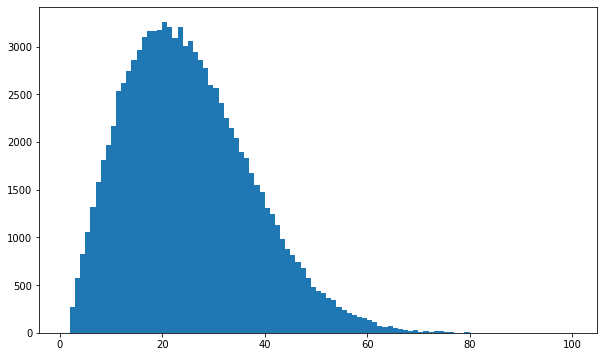

Couple first most likely values: [20 23 21 19 18 17 16 22 25 24]
Average value: 24.66451


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random


N = 100000
stats = np.loadtxt("us_births_69_88.csv", skiprows=1, delimiter=',', dtype=int)

def create_sample(counts):
    max_count = np.max(counts) # 212915 - maksymalna liczba urodzeń
    size = counts.shape[0] # 372 - tyle jest dni
    
    def sample():
        day = np.random.randint(0, size - 1, 150)
        X = np.random.randint(1, max_count, 150)
        return day[X < counts[day]]
    return sample


def emp_dates(size, sample):
    s = set()
    days = sample()

    for k in range(size + 1):
        if days[k] in s:
            return k + 1
        else:
            s.add(days[k])


size = stats.shape[0]
sample = create_sample(stats[:, 2])
emp_sample = [emp_dates(size, sample) for i in range(N)]

plt.figure(figsize=(10, 6))
plt.hist(emp_sample, bins=range(1, 101))
plt.show()

vals, counts = np.unique(emp_sample, return_counts=True)
k_counts = vals[np.argsort(counts)][::-1]

print('Couple first most likely values: {}'.format(k_counts[:10]))
print('Average value: {}'.format(np.mean(emp_sample)))